# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import statistic
%reload_ext autoreload

# load data

In [44]:
X=pd.DataFrame({'age':[21,21,19, 30,21,21,19,30,19],
                'gender':['M','M','N','M','F','F','F','F',"M"],
                'civil_status':['MARRIED','SINGLE','SINGLE','SINGLE','MARRIED','SINGLE','WIDOW','DIVORCED','SINGLE'],
                'salary':[3000.0,1200.0 ,32000.0,1800.0 ,2900.0 ,1100.0 ,10000.0,1500.0,1900.0],
                'has_children':[1,0,1,1,1,0,0,1,0],
                'available_credit':[2200,100,22000,1100,2000,100,6000,2200,190]})
y = X.iloc[1:3,:]

In [35]:
X

age gender civil_status   salary  has_children  available_credit
0  21.0      M      MARRIED   3000.0           1.0            2200.0
1  21.0      M       SINGLE   1200.0           0.0             100.0
2  19.0      N       SINGLE  32000.0           1.0           22000.0
3  30.0      M       SINGLE   1800.0           1.0            1100.0
4  21.0      F      MARRIED   2900.0           1.0            2000.0
5  21.0      F       SINGLE   1100.0           0.0             100.0
6  19.0      F        WIDOW  10000.0           0.0            6000.0
7  30.0      F     DIVORCED   1500.0           1.0            2200.0
8   NaN   None         None      NaN           NaN               NaN

In [36]:
y

age gender civil_status   salary  has_children  available_credit
1  21.0      M       SINGLE   1200.0           0.0             100.0
2  19.0      N       SINGLE  32000.0           1.0           22000.0

In [24]:
# X = np.asarray(X)
# y = np.asarray(y)

# gower distance matrix

In [37]:
result = statistic.gower_distance(X)

In [38]:
result

array([[0.        , 0.3590238 , 0.6707398 , 0.31787416, 0.16872811,
        0.52622986, 0.59697855, 0.47778758,        nan],
       [0.3590238 , 0.        , 0.6964303 , 0.3138769 , 0.523629  ,
        0.16720603, 0.45600235, 0.6539635 ,        nan],
       [0.6707398 , 0.6964303 , 0.        , 0.6552807 , 0.6728013 ,
        0.6969697 , 0.740428  , 0.8151941 ,        nan],
       [0.31787416, 0.3138769 , 0.6552807 , 0.        , 0.4824794 ,
        0.48108295, 0.74818605, 0.34332284,        nan],
       [0.16872811, 0.523629  , 0.6728013 , 0.4824794 , 0.        ,
        0.35750175, 0.43237334, 0.3121036 ,        nan],
       [0.52622986, 0.16720603, 0.6969697 , 0.48108295, 0.35750175,
        0.        , 0.2898751 , 0.4878362 ,        nan],
       [0.59697855, 0.45600235, 0.740428  , 0.74818605, 0.43237334,
        0.2898751 , 0.        , 0.57476616,        nan],
       [0.47778758, 0.6539635 , 0.8151941 , 0.34332284, 0.3121036 ,
        0.4878362 , 0.57476616, 0.        ,        nan],


In [39]:
result[0]

array([0.        , 0.3590238 , 0.6707398 , 0.31787416, 0.16872811,
       0.52622986, 0.59697855, 0.47778758,        nan], dtype=float32)

distance between row 1 vs row 2 is 0.3

distance between row 1 vs row 3 is 0.6

This indicates that Row 1 is the most similar to Row 3. 

## top n value

I usually need to find look-alike customer for my company. E.g. one customer with certain KPI and properties — location, tenure, RFM metrics etc and they are often mixed type. Gower distance can easily be calculated the distance between them and allows me to give certain variables higher/lower weight.

In [40]:
result,top_n = statistic.gower_distance(X,selected_unit=X.iloc[0:1,:],n=9)

In [41]:
top_n

{'index': array([0, 4, 3, 1, 7, 5, 6, 2, 8], dtype=int64),
 'values': array([0.        , 0.16872811, 0.31787416, 0.3590238 , 0.47778758,
        0.52622986, 0.59697855, 0.6707398 , 1.        ], dtype=float32)}

## cluster 

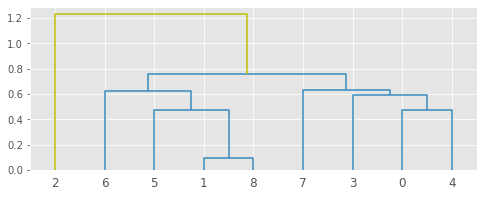

In [45]:
result,cld = statistic.gower_distance(X,n_cluster=3)

In [46]:
cld

array([2, 1, 3, 2, 2, 1, 1, 2, 1], dtype=int32)